### Here we look at correlatiton between symptoms.

Using Matthews correlation for binary variables. (Could also use Tetrachoric or Pearson?).

* Can we reduce dimensionality by combining highly correlated features into a single real numbered value? Does this make sense, or is it imposing structure on our clusters?
* Or can we at least produce better symptom groupings this way? For use in analysis.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics import matthews_corrcoef

from utilities import load_symptom_data
%matplotlib inline

In [6]:
# df = pd.read_csv('../data/cleaned_data_SYMPTOMS_8_24_23.csv', index_col=0)
df = load_symptom_data('../data/cleaned_data_SYMPTOMS_9_13_23.csv')

In [7]:
corr = np.zeros((len(df.columns), len(df.columns)))

In [8]:
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        if i!=j:
            corr[i, j] = matthews_corrcoef(df[df.columns[i]], df[df.columns[j]])

In [9]:
corr.shape

(162, 162)

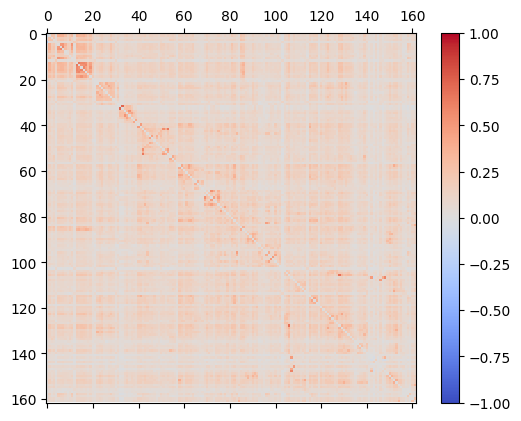

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax);

#### There are comparitively few negatively correlated symptoms, and they are not strong:

In [11]:
(corr < 0).sum().sum()

214

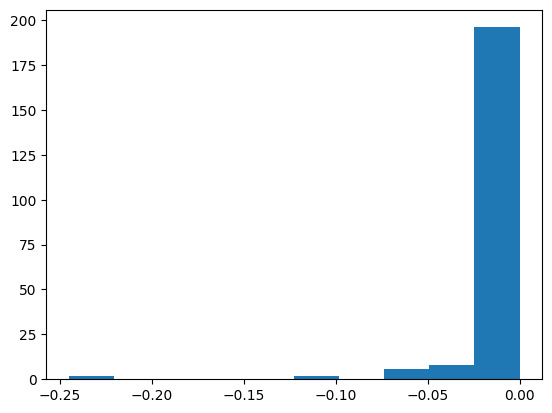

In [12]:
plt.hist(corr[(corr < 0)]);

In [13]:
(corr > 0).sum().sum()

25868

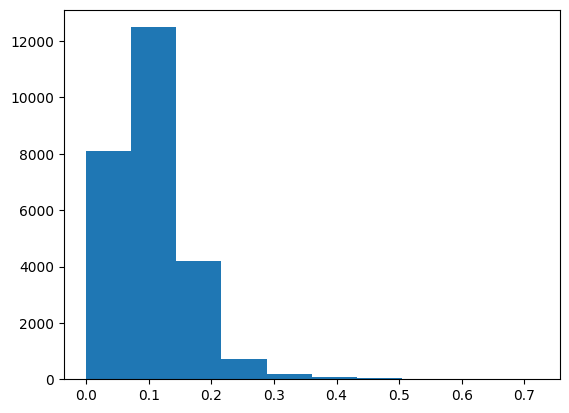

In [14]:
plt.hist(corr[(corr > 0)]);

In [15]:
(corr > 0.5).sum().sum()

38

(array([[  1.,   1., 148., ...,   0.,   0.,   0.],
        [  0.,   1.,  11., ...,   0.,   0.,   0.],
        [  0.,   0.,  18., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,  92., ...,   0.,   0.,   0.],
        [  0.,   0.,  16., ...,   0.,   0.,   0.],
        [  0.,   0.,  27., ...,   0.,   0.,   0.]]),
 array([-0.2450936 , -0.14854819, -0.05200278,  0.04454263,  0.14108804,
         0.23763345,  0.33417886,  0.43072427,  0.52726968,  0.62381509,
         0.7203605 ]),
 <a list of 162 BarContainer objects>)

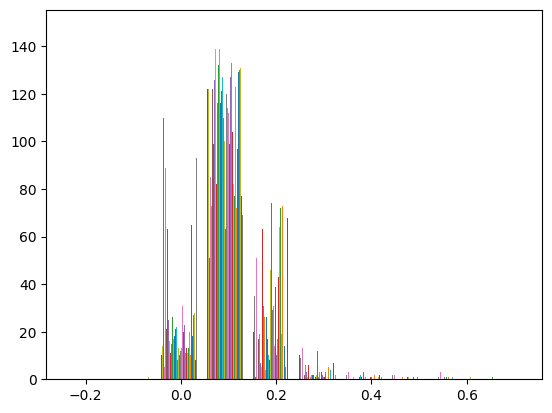

In [57]:
plt.hist(corr)

#### Most symptoms pairs have weak positive correlation.

#### (Perhaps the negative and stronger pairs are of interest?)

#### Probably those weak +ve correlations are not strong enough to define a symptom group...but lets see

In [16]:
adj = corr.copy()

In [17]:
adj[adj <=0 ] = 0 

In [18]:
G = nx.convert_matrix.from_numpy_array(adj)

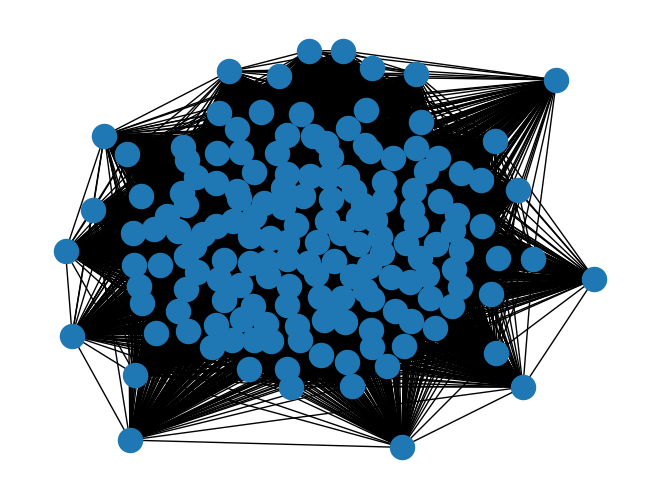

In [19]:
nx.draw(G)

In [20]:
lou_communities = nx.community.louvain_communities(G, resolution=1.1)

In [37]:
gn_communities = nx.community.girvan_newman(G)

In [48]:
gr_communities = nx.community.greedy_modularity_communities(G, weight='weight', resolution=1.1)

In [49]:
len(list(gr_communities))

10

In [50]:
def partition_to_labels(part, index_df=df.transpose()):
    
    c_labels = {c:ci for ci,com in enumerate(part) for c in com}
    return np.array([c_labels[i] for i,index in enumerate(index_df.index)])

In [51]:
labels = partition_to_labels(gr_communities)

In [52]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([34, 26, 24, 21, 16, 12, 12,  8,  5,  4]))

In [55]:
def symptom_communities(_communities):
    symptom_communities = {}

    for ci, c in enumerate(communities):
        symptom_communities[ci] = [
            df.columns[i]
            for i in c
        ]
    return symptom_communities

In [56]:
symptom_communities(gr_communities)

{0: ['Symptom_Memory_short',
  'Symptom_Memory_long',
  'Symptom_Memory_no_new_memories',
  'Symptom_Memory_forget_tasks',
  'Symptom_Cognitive_Functioning_thinking',
  'Symptom_Cognitive_Functioning_executive',
  'Symptom_Cognitive_Functioning_problemsolving',
  'Symptom_Cognitive_Functioning_slowedthoughts',
  'Symptom_Cognitive_Functioning_fastthoughts',
  'Symptom_Cognitive_Functioning_agnosia',
  'Symptom_Cognitive_Functioning_attentionconcentration',
  'Symptom_Speech_difficulty_finding_words',
  'Symptom_Speech_difficulty_communicating_verbally',
  'Symptom_Speech_difficulty_reading_processing_text',
  'Symptom_Speech_difficulty_understanding_others_speech',
  'Symptom_Speech_difficulty_speaking_complete_sentences',
  'Symptom_Speech_speaking_unrecognizable_words',
  'Symptom_Speech_difficulty_communicating_writing',
  'Symptom_Speech_changes_to_secondary_languages',
  'Symptom_Acute_confusion',
  'Symptom_Slurring_words',
  'Symptom_Reproductive_sexual_dysfunction'],
 1: ['Symp